In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [17]:
Scop3P_confident_Sites=pd.read_csv("Scop3P_confident_sites.txt",sep='\t')
print ("Scop3P P-sites: ", Scop3P_confident_Sites.shape[0])
Scop3P_disorder_data=pd.read_csv("Scop3P_disorder_data.txt",sep='\t')
fraction_disordered=pd.read_csv("Fraction_disordered.txt",sep='\t')
print ('Final proteins and sites in Scop3P disorder data')
print (Scop3P_disorder_data['ACC_ID'].nunique(),\
       Scop3P_disorder_data[['ACC_ID','UP_POS']].drop_duplicates().shape[0])

Scop3P P-sites:  81404
Final proteins and sites in Scop3P disorder data
8171 53276


No handles with labels found to put in legend.


total proteins disorder in scop3P overall not particular to P-sites 11880


Text(0.5, 0, 'fraction disordered')

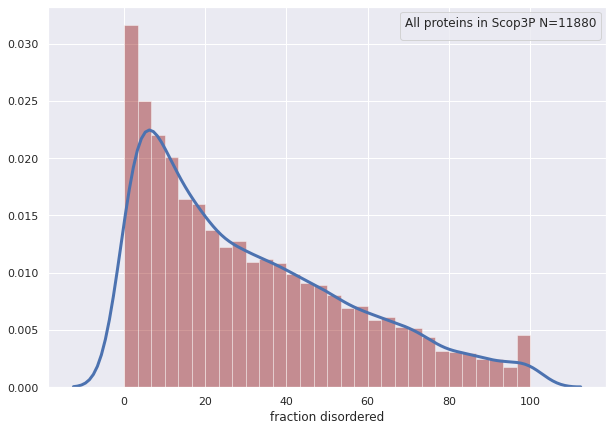

In [18]:
########################################################################## plot all proteins disordered in scop3p
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
print ("total proteins disorder in scop3P overall not particular to P-sites",fraction_disordered.shape[0])
sns.distplot(fraction_disordered["fraction_disordered"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})           #Disorder_overall.png
plt.legend(title='All proteins in Scop3P N=11880')
plt.xlabel("fraction disordered")

Text(0.5, 0, 'fraction disordered')

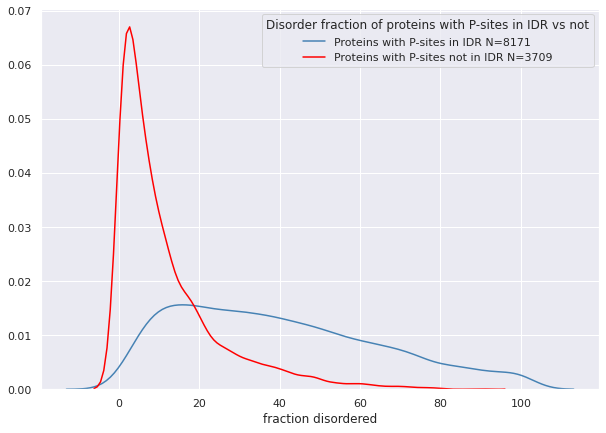

In [19]:
plt.figure(figsize=(10,7))
Scop3P_only_phos=fraction_disordered[fraction_disordered['ACC_ID'].isin(list(set(Scop3P_disorder_data['ACC_ID'].tolist())))]
Scop3P_not_phos=fraction_disordered[~fraction_disordered['ACC_ID'].isin(list(set(Scop3P_disorder_data['ACC_ID'].tolist())))]

sns.kdeplot(Scop3P_only_phos['fraction_disordered'],color='steelblue')   ## Disorder_vs_not_overall.png
sns.kdeplot(Scop3P_not_phos['fraction_disordered'],color='red')
plt.legend(title="Disorder fraction of proteins with P-sites in IDR vs not", \
           labels=["Proteins with P-sites in IDR N=8171","Proteins with P-sites not in IDR N=3709"])

plt.xlabel("fraction disordered")

PhosphoS    39550
PhosphoT    11066
PhosphoY     2660
Name: Modification_name, dtype: int64
PhosphoS    57799
PhosphoT    17123
PhosphoY     6482
Name: Modification_name, dtype: int64
19 14 16


/home/pathmanaban/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:ylabel='feature'>

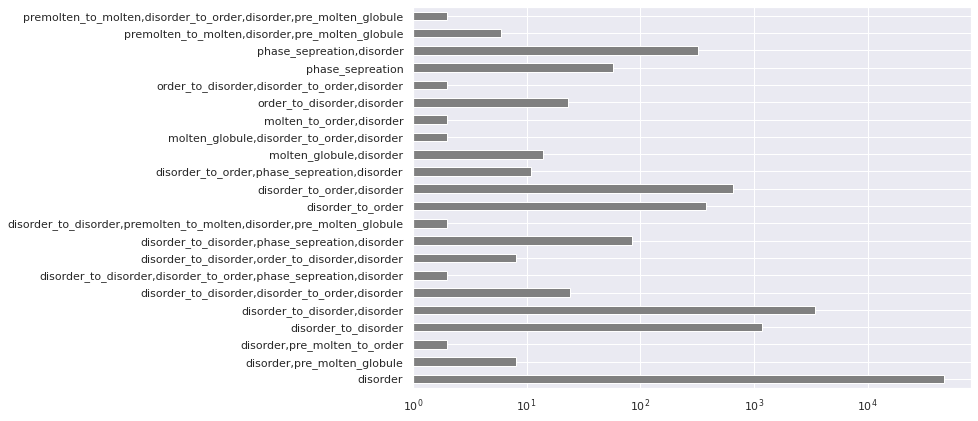

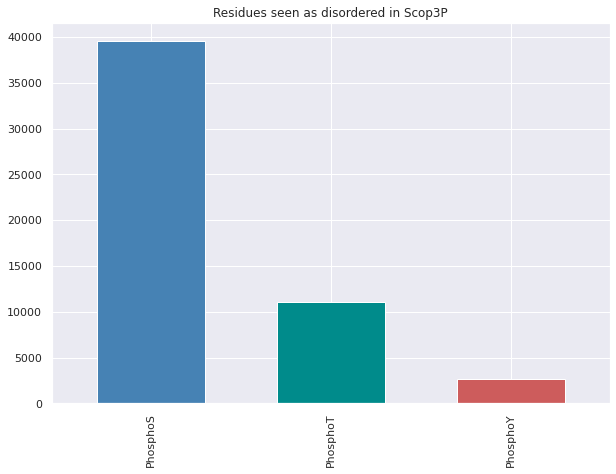

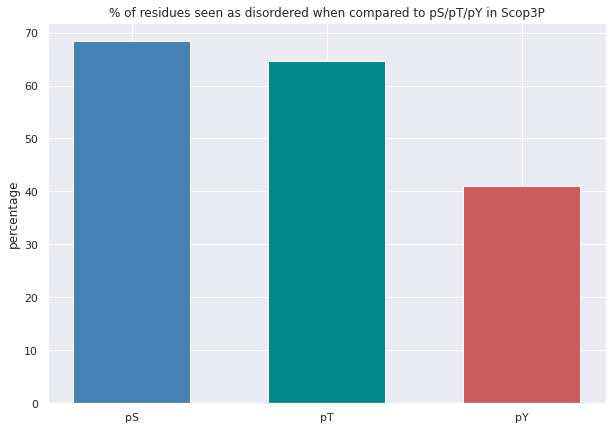

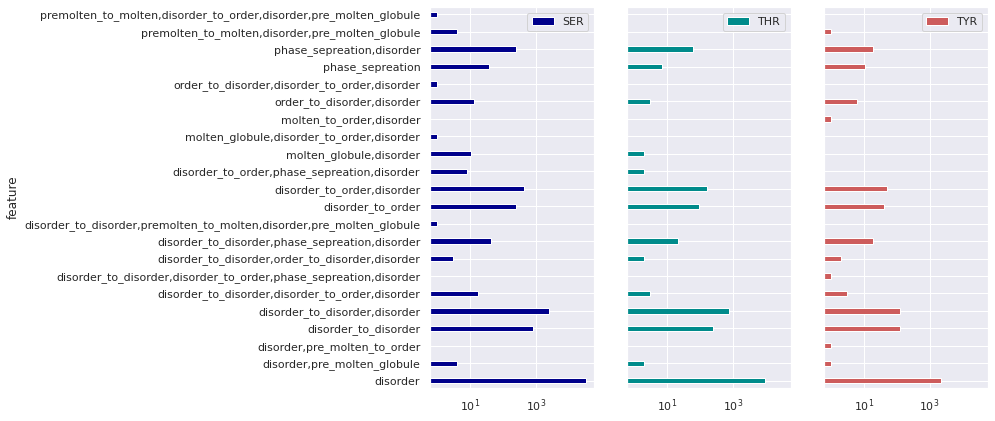

In [22]:
######################################################################### Disorder fetaures

plt.figure(figsize=(10,7))  

Scop3P_disorder_data.feature.value_counts(normalize=False).sort_index().plot(log=True,kind='barh',color='grey')

####### Attach Scop3P for residues level annotation
Scop3P_disorderDF=Scop3P_disorder_data.merge(Scop3P_confdent_Sites,on=['ACC_ID','UP_POS'])
Scop3P_disorderDF=Scop3P_disorderDF[['ACC_ID','UP_POS','feature','Modification_name']].drop_duplicates()

########################################################## this plot shows absolute numbers in disordered data 
plt.figure(figsize=(10,7))
Scop3P_disorderDF.Modification_name.value_counts(normalize=False).sort_index().plot(kind='bar',width=0.6,\
                                                                         color=['steelblue','darkcyan','indianred'])
plt.title("Residues seen as disordered in Scop3P")
print (Scop3P_disorderDF.Modification_name.value_counts())
print (Scop3P_confident_Sites.Modification_name.value_counts())

################################################3 This is percentage of residues disorder in overall pS.pT.pY
plt.figure(figsize=(10,7))
plt.bar(['pS','pT','pY'],[39550/57799*100,11066/17123*100,2660/6482*100],\
        color=['steelblue','darkcyan','indianred'],width=0.6)

plt.title("% of residues seen as disordered when compared to pS/pT/pY in Scop3P")  # disorder_STY_general
plt.ylabel('percentage')

Scop3P_dis_Group=Scop3P_disorderDF.groupby(['Modification_name','feature']).size().reset_index(name="count")

SER_dis=Scop3P_dis_Group[Scop3P_dis_Group['Modification_name']=='PhosphoS']
THR_dis=Scop3P_dis_Group[Scop3P_dis_Group['Modification_name']=='PhosphoT']
TYR_dis=Scop3P_dis_Group[Scop3P_dis_Group['Modification_name']=='PhosphoY']

SER_dis.reset_index(drop=True, inplace=True)
THR_dis.reset_index(drop=True, inplace=True)
TYR_dis.reset_index(drop=True, inplace=True)



print (SER_dis.shape[0],THR_dis.shape[0],TYR_dis.shape[0])


############### same plot with missing varibales assigned 0
checklist=list(set(Scop3P_disorder_data.feature.tolist()))
checklist=list(set(checklist))
for elem in checklist:
    if elem not in SER_dis.feature.values:
        SER_dis.loc[-1] = ['S',elem, 0] # add new row
        SER_dis.index = SER_dis.index + 1  # shifting index
        SER_dis = SER_dis.sort_index()  # 


for elem in checklist:
    if elem not in TYR_dis.feature.values:
        TYR_dis.loc[-1] = ['Y',elem, 0] # add new row
        TYR_dis.index = TYR_dis.index + 1  # shifting index
        TYR_dis = TYR_dis.sort_index()  # 
        
for elem in checklist:
    if elem not in THR_dis.feature.values:
        THR_dis.loc[-1] = ['T',elem, 0] # add new row
        THR_dis.index = THR_dis.index + 1  # shifting index
        THR_dis = THR_dis.sort_index()  # 

SER_dis.sort_values('feature',inplace=True)
THR_dis.sort_values('feature',inplace=True)
TYR_dis.sort_values('feature',inplace=True)



fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,sharex=True,figsize=(10,10))  # disorder_STY_transition_general


SER_dis.plot(x='feature',y='count',width=0.3,kind='barh',\
             figsize=(10,7),ax=ax1,log=True,label='SER',color='darkblue')
THR_dis.plot(x='feature',y='count',width=0.3,kind='barh',\
             figsize=(10,7),ax=ax2,log=True,label='THR',color='darkcyan')
TYR_dis.plot(x='feature',y='count',width=0.3,kind='barh',\
             figsize=(10,7),ax=ax3,log=True,label='TYR',color='indianred')

